# ANALYZE HOTEL BOOKING DEMAND

Datasets: https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005

## Install environment

In [ ]:
# Use this cell if running this file on Google Colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Use this cell if pandas is not install
pip install pandas

In [265]:
# Use this cell if Jinja2 is not install
pip install Jinja2

   ---------------------------------------- 0.0/133.2 kB ? eta -:--:--
   --- ------------------------------------ 10.2/133.2 kB ? eta -:--:--
   ------------------ --------------------- 61.4/133.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 133.2/133.2 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Necessity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Display full output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Create DataFrame

In [3]:
# Create DataFrame df1 using Dataset "H1.csv" 
# f1 = "/content/drive/MyDrive/Colab Notebooks/PTDL_BaiTapNhom/H1.csv" # old path
f1 = "Datasets/H1.csv" # new path
df1 = pd.read_csv(f1)
df1

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,...,No Deposit,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,0,169,2017,August,35,30,2,9,2,0,...,No Deposit,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,0,204,2017,August,35,29,4,10,2,0,...,No Deposit,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,0,211,2017,August,35,31,4,10,2,0,...,No Deposit,40,NULL,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [4]:
# Create DataFrame df2 using Dataset "H2.csv" 
# f2 = "/content/drive/MyDrive/Colab Notebooks/PTDL_BaiTapNhom/H2.csv" # old path
f2 = "Datasets/H2.csv" # new path
df2 = pd.read_csv(f2)
df2

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
# Check if DataFrame 1 is the same with DataFrame 2 or not
df1.equals(df2)

False

## Pre-processing

### DataFrame 1

In [6]:
# Show information of DataFrame 1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   40060 non-null  int64  
 1   LeadTime                     40060 non-null  int64  
 2   ArrivalDateYear              40060 non-null  int64  
 3   ArrivalDateMonth             40060 non-null  object 
 4   ArrivalDateWeekNumber        40060 non-null  int64  
 5   ArrivalDateDayOfMonth        40060 non-null  int64  
 6   StaysInWeekendNights         40060 non-null  int64  
 7   StaysInWeekNights            40060 non-null  int64  
 8   Adults                       40060 non-null  int64  
 9   Children                     40060 non-null  int64  
 10  Babies                       40060 non-null  int64  
 11  Meal                         40060 non-null  object 
 12  Country                      39596 non-null  object 
 13  MarketSegment   

In [7]:
# Show statistical numbers of DataFrame 1
df1.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.00000
mean,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,0.527758,94.952930,0.138068,0.61977
std,0.447837,97.285315,0.722347,14.005441,8.883708,1.147812,2.461329,0.697285,0.445195,0.118998,0.205948,1.335115,1.001955,0.726548,7.428580,61.442418,0.351001,0.81393
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.00000
25%,0.000000,10.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.00000
50%,0.000000,57.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.00000
75%,1.000000,155.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,1.00000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,185.000000,508.000000,8.000000,5.00000


In [8]:
# Show the quantity of rows and columns of DataFrame 1
df1.shape

(40060, 31)

In [9]:
# Show unique value of DataFrame 1
df1.value_counts(dropna=False)

IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateMonth  ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies  Meal       Country  MarketSegment  DistributionChannel  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  BookingChanges  DepositType      Agent  Company  DaysInWaitingList  CustomerType     ADR    RequiredCarParkingSpaces  TotalOfSpecialRequests  ReservationStatus  ReservationStatusDate
1           92        2016             February          9                      26                     1                     2                  2       0         0       Undefined  PRT      Groups         TA/TO                0                1                      0                            A                 A                 0               Non Refund        134   NULL     0                  Transient        79.00  0                         0                       Canceled     

In [10]:
# Check null values
df1.isnull()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40056,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40057,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40058,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Check summary of null values of each column
df1.isnull().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        464
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

In [12]:
# Show percentage between null values and all values
df1['Country'].isnull().sum() / df1['Country'].count()

0.011718355389433275

In [13]:
# Delete rows that have null values
df1 = df1.dropna()

In [16]:
# Check if there is a null value in "Country" attribute again
df1['Country'].isnull().sum()

0

In [14]:
# Check quantity of duplicated rows in Dataframe 1
df1.duplicated().sum()

6074

In [15]:
# Show percentage between duplicated values and all values
df1.duplicated().sum() / df1['Country'].count()

0.15339933326598645

In [16]:
# Delete all duplicated values
df1 = df1.drop_duplicates()

In [17]:
# Check if there are any duplicated values
df1.duplicated().sum()

0

In [18]:
# Correlation matrix
df1.corr(method='pearson', numeric_only=True).style.background_gradient(cmap='coolwarm').format(precision=2)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
IsCanceled,1.00,0.18,0.08,0.02,0.01,0.09,0.10,0.08,0.12,-0.01,-0.11,0.07,-0.07,-0.09,-0.02,0.17,-0.24,-0.05
LeadTime,0.18,1.00,0.10,0.12,-0.02,0.39,0.45,0.14,0.03,0.01,-0.15,0.03,-0.10,0.10,0.09,0.08,-0.13,0.05
ArrivalDateYear,0.08,0.10,1.00,-0.52,-0.00,0.01,-0.00,-0.02,0.05,-0.02,0.08,-0.05,0.07,0.03,-0.00,0.12,-0.02,0.05
ArrivalDateWeekNumber,0.02,0.12,-0.52,1.00,0.09,0.05,0.06,0.05,0.02,0.02,-0.08,0.02,-0.06,0.01,0.03,0.17,0.01,0.05
ArrivalDateDayOfMonth,0.01,-0.02,-0.00,0.09,1.00,-0.03,-0.05,-0.00,0.02,-0.00,0.00,-0.01,0.01,-0.00,0.01,0.03,0.01,0.01
StaysInWeekendNights,0.09,0.39,0.01,0.05,-0.03,1.00,0.73,0.10,0.03,0.01,-0.14,-0.01,-0.10,0.06,0.00,0.10,-0.11,0.05
StaysInWeekNights,0.10,0.45,-0.00,0.06,-0.05,0.73,1.00,0.10,0.03,0.01,-0.14,-0.00,-0.10,0.08,0.02,0.12,-0.12,0.05
Adults,0.08,0.14,-0.02,0.05,-0.00,0.10,0.10,1.00,0.07,0.02,-0.14,-0.02,-0.13,-0.01,-0.02,0.19,0.01,0.07
Children,0.12,0.03,0.05,0.02,0.02,0.03,0.03,0.07,1.00,0.02,-0.05,-0.01,-0.04,0.03,-0.02,0.35,0.03,0.01
Babies,-0.01,0.01,-0.02,0.02,-0.00,0.01,0.01,0.02,0.02,1.00,-0.03,-0.01,-0.02,0.10,-0.01,0.05,0.03,0.13


In [19]:
df1[df1['ADR'] < 0].index

Index([14969], dtype='int64')

In [20]:
df1 = df1.drop(df1[df1['ADR'] < 0].index)

In [21]:
df1[df1['ADR'] < 0].index

Index([], dtype='int64')

### DataFrame 2

In [22]:
# Show information of DataFrame 2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [23]:
# Show statistical numbers of DataFrame 2
df2.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,0.025615,0.079743,0.132371,0.187369,3.226774,105.304465,0.024367,0.546918
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372177,0.084323,0.157983,0.415472,1.693411,0.608620,20.870890,43.602954,0.154919,0.780776
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


In [24]:
# Show the quantity of rows and columns of DataFrame 2
df2.shape

(79330, 31)

In [25]:
# Show unique value of DataFrame 2
df2.value_counts(dropna=False)

IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateMonth  ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies  Meal       Country  MarketSegment  DistributionChannel  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  BookingChanges  DepositType      Agent  Company  DaysInWaitingList  CustomerType     ADR     RequiredCarParkingSpaces  TotalOfSpecialRequests  ReservationStatus  ReservationStatusDate
1           277       2016             November          46                     7                      1                     2                  2       0.0       0       BB         PRT      Groups         TA/TO                0                0                      0                            A                 A                 0               Non Refund       NULL   NULL     0                  Transient        100.00  0                         0                       Canceled   

In [26]:
# Check null values
df2.isnull()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79326,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79327,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79328,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# Check summary of null values of each column
df2.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [28]:
# Show percentage between null values of "Country" and all values
df2['Country'].isnull().sum() / df2['Country'].count()

0.0003026252742541548

In [29]:
# Show percentage between null values of "Children" and all values
df2['Children'].isnull().sum() / df2['Country'].count()

5.04375457090258e-05

In [30]:
# Delete rows that have null values
df2 = df2.dropna()

In [31]:
# Check if there is a null value in "Country" attribute again
df2['Country'].isnull().sum()

0

In [32]:
# Check if there is a null value in "Children" attribute again
df2['Children'].isnull().sum()

0

In [33]:
# Check quantity of duplicated rows in Dataframe 2
df2.duplicated().sum()

25884

In [34]:
# Show percentage between duplicate values and all values
df2.duplicated().sum() / df2['Country'].count()

0.32639782098812137

In [35]:
# Delete all duplicated values
df2 = df2.drop_duplicates()

In [36]:
# Check if there are any duplicated values
df2.duplicated().sum()

0

In [37]:
# Correlation matrix
df2.corr(method='pearson', numeric_only=True).style.background_gradient(cmap='coolwarm').format(precision=2)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
IsCanceled,1.00,0.19,0.08,-0.01,0.00,0.06,0.11,0.09,0.04,-0.02,-0.08,0.04,-0.05,-0.09,0.01,0.09,-0.13,-0.16
LeadTime,0.19,1.00,0.18,0.09,0.03,0.09,0.17,0.14,0.03,-0.02,-0.15,-0.01,-0.07,0.05,0.16,-0.03,-0.05,0.02
ArrivalDateYear,0.08,0.18,1.00,-0.51,-0.02,0.02,0.05,0.10,0.04,-0.02,-0.01,-0.06,0.02,0.00,-0.04,0.21,-0.02,0.07
ArrivalDateWeekNumber,-0.01,0.09,-0.51,1.00,0.10,0.00,-0.01,-0.00,0.01,0.01,-0.00,0.00,-0.01,0.01,0.01,0.04,0.00,0.05
ArrivalDateDayOfMonth,0.00,0.03,-0.02,0.10,1.00,-0.01,-0.01,0.00,0.02,0.00,-0.01,-0.01,-0.00,0.01,0.00,0.02,0.01,-0.01
StaysInWeekendNights,0.06,0.09,0.02,0.00,-0.01,1.00,0.31,0.08,0.02,0.00,-0.10,-0.03,-0.04,0.03,-0.04,0.01,-0.05,0.02
StaysInWeekNights,0.11,0.17,0.05,-0.01,-0.01,0.31,1.00,0.10,0.02,0.00,-0.12,-0.03,-0.05,0.07,0.01,0.02,-0.05,0.04
Adults,0.09,0.14,0.10,-0.00,0.00,0.08,0.10,1.00,-0.02,0.01,-0.21,-0.06,-0.13,-0.09,-0.02,0.31,0.01,0.15
Children,0.04,0.03,0.04,0.01,0.02,0.02,0.02,-0.02,1.00,0.02,-0.04,-0.02,-0.03,0.03,-0.02,0.31,0.04,0.07
Babies,-0.02,-0.02,-0.02,0.01,0.00,0.00,0.00,0.01,0.02,1.00,-0.00,-0.00,-0.01,0.06,-0.01,0.01,0.02,0.07


C:\Users\phuon\AppData\Local\Temp\ipykernel_16040\2286132849.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, cmap='viridis')


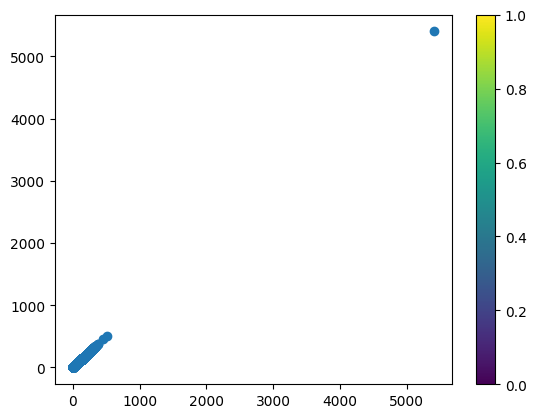

In [38]:
x = df2['ADR']
y = df2['ADR']
plt.scatter(x, y, cmap='viridis')
plt.colorbar()
plt.show()

In [39]:
df2 = df2.drop(df2[df2['ADR'] >= 5000].index)

In [40]:
df2[df2['ADR'] >= 5000]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate


## EDA

In [41]:
df1.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,33521.000000,33521.000000,33521.000000,33521.000000,33521.000000,33521.000000,33521.000000,33521.000000,33521.000000,33521.000000,33521.000000,33521.00000,33521.000000,33521.000000,33521.000000,33521.000000,33521.000000,33521.000000
mean,0.237045,84.180633,2016.144417,27.170192,15.917097,1.222845,3.193371,1.881865,0.150920,0.016408,0.050774,0.02139,0.153038,0.312342,0.328153,99.526305,0.159661,0.681066
std,0.425277,91.956644,0.721596,13.756767,8.885500,1.157075,2.478154,0.737630,0.478895,0.128904,0.219539,0.36418,1.013850,0.762951,5.955624,63.816793,0.373076,0.828765
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,52.200000,0.000000,0.000000
50%,0.000000,48.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
75%,0.000000,140.000000,2017.000000,37.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,135.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,26.00000,30.000000,17.000000,185.000000,508.000000,8.000000,5.000000


In [42]:
df1[['RequiredCarParkingSpaces', 'TotalOfSpecialRequests']].median()

RequiredCarParkingSpaces    0.0
TotalOfSpecialRequests      0.0
dtype: float64

In [43]:
df2.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000
mean,0.300279,77.689930,2016.254114,26.635771,15.755883,0.872157,2.274388,1.876425,0.131868,0.007338,0.031975,0.035775,0.191531,0.246401,1.020443,110.900996,0.035625,0.711028
std,0.458383,82.114212,0.659215,13.585945,8.801761,0.913677,1.618210,0.544130,0.442202,0.102675,0.175935,0.372822,2.039006,0.704120,11.902919,42.254763,0.186263,0.833569
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.300000,0.000000,1.000000
75%,1.000000,118.000000,2017.000000,37.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,391.000000,510.000000,3.000000,5.000000


In [44]:
df2[['RequiredCarParkingSpaces', 'TotalOfSpecialRequests']].median()

RequiredCarParkingSpaces    0.0
TotalOfSpecialRequests      1.0
dtype: float64

<BarContainer object of 33521 artists>

Text(0.5, 0, 'Tuần')

Text(0, 0.5, 'ADR')

Text(0.5, 1.0, 'So sánh ADR theo các tuần trong năm')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


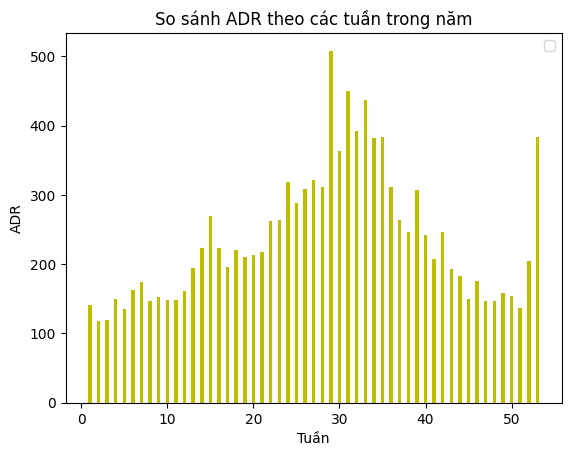

In [50]:
plt.bar(df1['ArrivalDateWeekNumber'], df1['ADR'], color ='y', width = 0.4)
plt.xlabel('Tuần')
plt.ylabel('ADR')
plt.title('So sánh ADR theo các tuần trong năm')
plt.legend()
plt.show()

<BarContainer object of 53417 artists>

Text(0.5, 0, 'Tuần')

Text(0, 0.5, 'ADR')

Text(0.5, 1.0, 'So sánh ADR theo các tuần trong năm')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


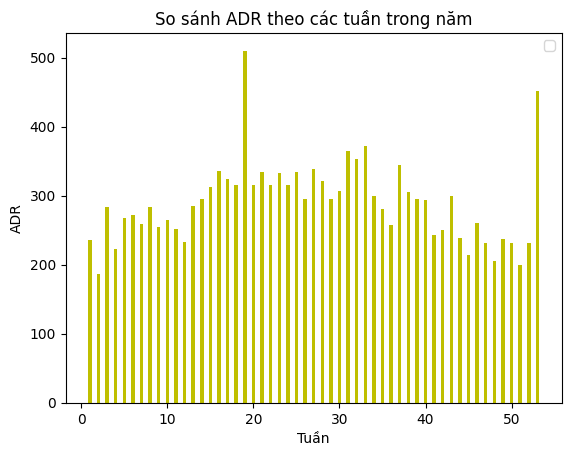

In [46]:
plt.bar(df2['ArrivalDateWeekNumber'], df2['ADR'], color ='y', width = 0.4)
plt.xlabel('Tuần')
plt.ylabel('ADR')
plt.title('So sánh ADR theo các tuần trong năm')
plt.legend()
plt.show()

In [65]:
df2[df2['ADR'] >= 5000]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
8455,1,35,2016,March,13,25,0,1,2,0.0,...,Non Refund,12,NULL,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [ ]:
# Choose column needed for clustering
X = df1[['Adults']]

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Distortion (Inertia)')

Text(0.5, 1.0, 'Elbow Plot for Optimal k')

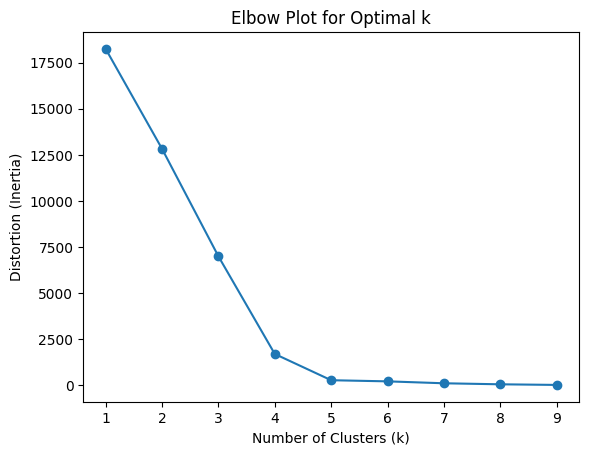

In [ ]:
# Use Elbow method
distortions = []
possible_k_values = range(1, 10)
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Draw Elbow plot
plt.plot(possible_k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Plot for Optimal k')
plt.show()

## CLUSTERING

### DataFrame 1

In [46]:
# Choose column needed for clustering
X = df1[['Adults']]

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Distortion (Inertia)')

Text(0.5, 1.0, 'Elbow Plot for Optimal k')

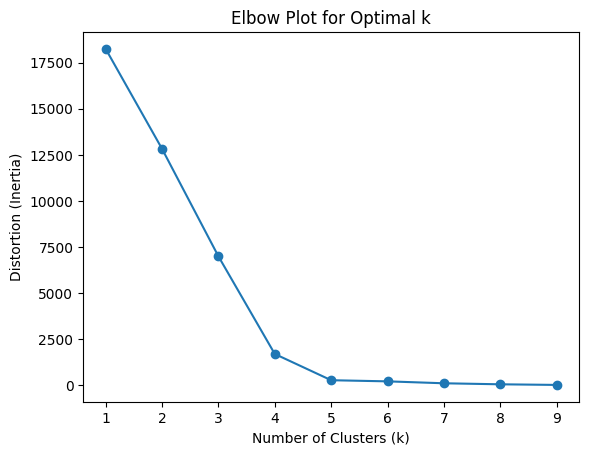

In [47]:
# Use Elbow method
distortions = []
possible_k_values = range(1, 10)
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Draw Elbow plot
plt.plot(possible_k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Plot for Optimal k')
plt.show()

Cluster Centers:
 [[ 2.05233961]
 [24.88888889]
 [48.33333333]
 [ 0.99826026]]
       IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0               0       342             2015             July   
1               0       737             2015             July   
2               0         7             2015             July   
3               0        13             2015             July   
4               0        14             2015             July   
...           ...       ...              ...              ...   
40055           0       212             2017           August   
40056           0       169             2017           August   
40057           0       204             2017           August   
40058           0       211             2017           August   
40059           0       161             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                         27                      1            

Text(0.5, 0, 'Adults')

Text(0, 0.5, 'Cluster')

Text(0.5, 1.0, 'Clusters based on Adults')

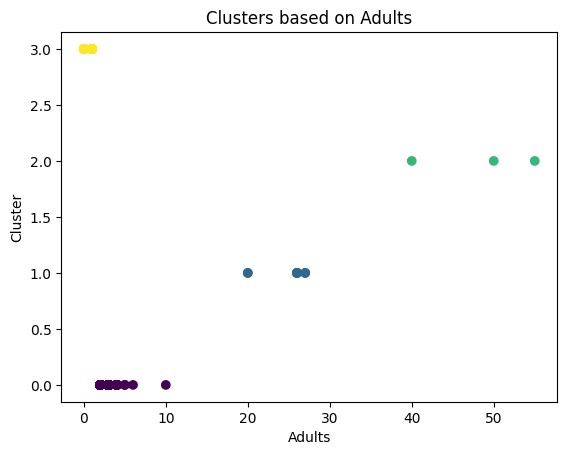

In [48]:
num_clusters = 4
# Use K-Means to clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df1['Cluster'] = kmeans.fit_predict(X)

# Show clusters
print("Cluster Centers:\n", kmeans.cluster_centers_)
print(df1)

# Draw chart
plt.scatter(df1['Adults'], df1['Cluster'], c=df1['Cluster'], cmap='viridis')
plt.xlabel('Adults')
plt.ylabel('Cluster')
plt.title('Clusters based on Adults')
plt.show()

In [49]:
# Choose column needed for clustering
X = df1[['Children']]

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

c:\Users\phuon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


KMeans(n_clusters=6, random_state=42)

c:\Users\phuon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


KMeans(n_clusters=7, random_state=42)

c:\Users\phuon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


KMeans(random_state=42)

c:\Users\phuon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


KMeans(n_clusters=9, random_state=42)

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Distortion (Inertia)')

Text(0.5, 1.0, 'Elbow Plot for Optimal k')

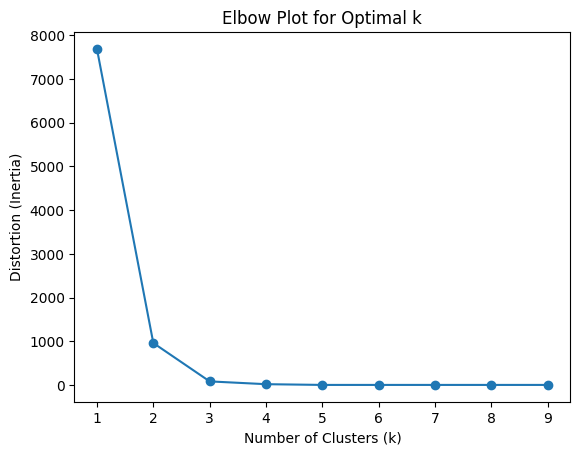

In [50]:
# Use Elbow method
distortions = []
possible_k_values = range(1, 10)
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Draw Elbow plot
plt.plot(possible_k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Plot for Optimal k')
plt.show()

### DataFrame 2